# Вариант 6
###### Индекс счастья
1. Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы.
2. Постройте график счастья по регионам, страны на графике должны представляться отдельными точками.
3. Оцените количество счастья по годам по регионам.
4. Определите наиболее сильно изменяющиеся параметры по разным странам в разные годы.
5. Определите страны, появляющиеся и исчезающие в рейтинге стран.
6. Удалите строки с пропущенными значениями. Выведите размер набора данных до и после удаления.
7. Вычислите корреляцию Пирсона и Спирмена между признаками Trust.Government.Corruption и Family. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.
8. Добавьте в набор данных признак, являющийся суммой двух других признаков.


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [49]:
happ15 = pd.read_csv('2015.csv')
happ16 = pd.read_csv('2016.csv')
happ17 = pd.read_csv('2017.csv')
happ15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [33]:
happ15.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [14]:
happ15.info()  #смотрим формат данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [58]:
happ17.rename(columns = {  "Happiness.Rank" : "Happiness Rank",
                        "Happiness.Score" : "Happiness Score",
                        "Whisker.high" : "Whisker high",
                        "Whisker.low" : "Whisker low",
                        "Economy..GDP.per.Capita." : "Economy (GDP per Capita)", 
                        "Trust..Government.Corruption." : "Trust (Government Corruption)",
                        "Dystopia.Residual" : "Dystopia Residual",
                        "Health..Life.Expectancy." : "Health (Life Expectancy)"}, inplace=True)

### Удалите строки с пропущенными значениями. Выведите размер набора данных до и после удаления.

In [40]:
print('До удаления: ', happ15.shape, happ16.shape, happ17.shape)
print('После: ', happ15.dropna().shape, happ16.dropna().shape, happ17.dropna().shape)


До удаления:  (158, 12) (157, 13) (155, 12)
После:  (158, 12) (157, 13) (155, 12)


### Визуализируйте корреляции между признаками, находящимися в наборе данных 

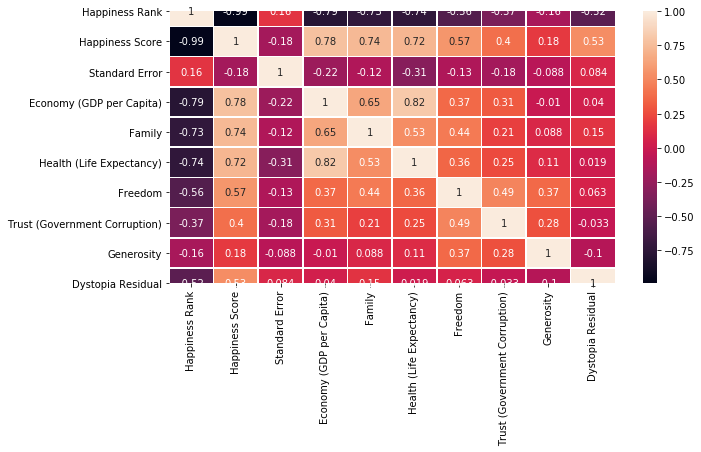

In [61]:
plt.figure(figsize=(10,5))
sns.heatmap(happ15.corr(), annot = True, linewidths=.5) 

### Постройте график счастья по регионам, страны на графике должны представляться отдельными точками

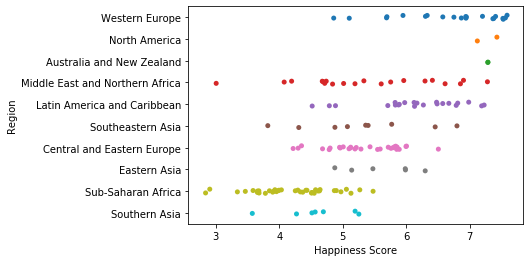

In [12]:
sns.stripplot(x='Happiness Score', y='Region', data=happ15)

### Оцените количество счастья по годам по регионам.


In [40]:
#добавляем в happ17 столбец регион и сопоставляем со странами
nh17 = happ17.merge(happ15[['Country', 'Region']],how='left')
pd.DataFrame({
    '2015': happ15.groupby(['Region'])['Happiness Score'].mean(),
    '2016': happ16.groupby(['Region'])['Happiness Score'].mean(),
    '2017': nh17.groupby(['Region'])['Happiness Score'].mean()
})

,2015,2016,2017
Region,,,
Australia and New Zealand,7.285000,7.323500,7.299000
Central and Eastern Europe,5.332931,5.370690,5.409931
Eastern Asia,5.626167,5.624167,5.496500
Latin America and Caribbean,6.144682,6.101750,5.957905
Middle East and Northern Africa,5.406900,5.386053,5.369684
North America,7.273000,7.254000,7.154500
Southeastern Asia,5.317444,5.338889,5.444875
Southern Asia,4.580857,4.563286,4.628429
Sub-Saharan Africa,4.202800,4.136421,4.084722


### Определите страны, появляющиеся и исчезающие в рейтинге стран

In [18]:
def diff(fir, sec, param):
    new_df = pd.concat([fir, sec])
    return new_df[param].drop_duplicates(keep=False)        #оставляем только те страны которые встречались единажды 

df = pd.concat([diff(happ15, happ16, 'Country'),
                diff(happ15, happ17, 'Country'),
                diff(happ16, happ17, 'Country')    
                ]).drop_duplicates().reset_index(drop=True) #находим разницу для каждого года, объединяем
                                                            #и выводим итоговый список стран    
df


0                         Oman
1            Somaliland region
2                   Mozambique
3                      Lesotho
4                    Swaziland
5                     Djibouti
6     Central African Republic
7                  Puerto Rico
8                       Belize
9                      Somalia
10           Somaliland Region
11                     Namibia
12                 South Sudan
13                      Taiwan
14                    Suriname
15                   Hong Kong
16                        Laos
17                     Comoros
18    Taiwan Province of China
19     Hong Kong S.A.R., China
Name: Country, dtype: object

### Определите наиболее сильно изменяющиеся параметры по разным странам в разные годы.

In [55]:
parameters = happ15.drop(['Happiness Rank'],
                     axis = 'columns').std().sort_values()
print('Наиболее сильно изменяющиеся параметры в 2015 году: ')
parameters.tail(5)



Наиболее сильно изменяющиеся параметры в 2015 году: 


Health (Life Expectancy)    0.247078
Family                      0.272369
Economy (GDP per Capita)    0.403121
Dystopia Residual           0.553550
Happiness Score             1.145010
dtype: float64

In [59]:
parameters = happ16.drop(['Happiness Rank'],
                     axis = 'columns').std().sort_values()
print('Наиболее сильно изменяющиеся параметры в 2016 году: ')
parameters.tail(5)


Наиболее сильно изменяющиеся параметры в 2016 году: 


Economy (GDP per Capita)     0.412595
Dystopia Residual            0.542220
Upper Confidence Interval    1.136493
Happiness Score              1.141674
Lower Confidence Interval    1.148043
dtype: float64

In [60]:
parameters = happ17.drop(['Happiness Rank'],
                     axis = 'columns').std().sort_values()
print('Наиболее сильно изменяющиеся параметры в 2017 году: ')
parameters.tail(5)


Наиболее сильно изменяющиеся параметры в 2017 году: 


Economy (GDP per Capita)    0.420793
Dystopia Residual           0.500028
Whisker high                1.118542
Happiness Score             1.131230
Whisker low                 1.145030
dtype: float64

### Вычислите корреляцию Пирсона и Спирмена между признаками Trust.Government.Corruption и Family. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value

In [28]:
p_val = stats.pearsonr(happ15['Trust (Government Corruption)'],
                      happ15['Family'])[1]
print("Корреляция Пирсона. p_value = {}".format(p_val))
if p_val < 0.05:
    print('Приемлимое значение p-value')
else:
    print('Не приемлимое значение p-value')
    
p_val = stats.spearmanr(happ15['Trust (Government Corruption)'],
                      happ15['Family'])[1]
print("Корреляция Спирмена. p_value = {}".format(p_val))
if p_val < 0.05:
    print('Приемлимое значение p-value')
else:
    print('Не приемлимое значение p-value')


Корреляция Пирсона. p_value = 0.009551833256262169
Приемлимое значение p-value
Корреляция Спирмена. p_value = 0.0202358284942051
Приемлимое значение p-value


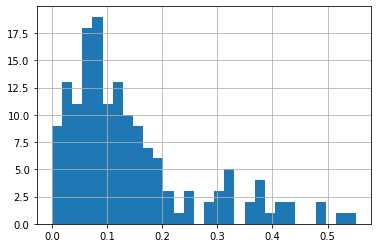

In [62]:
happ15['Trust (Government Corruption)'].hist(bins=30)

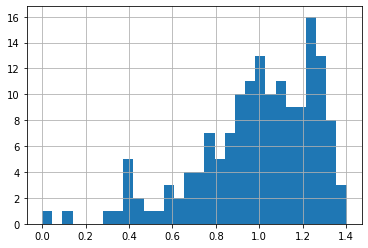

In [68]:
happ15['Family'].hist(bins=30)

### Добавьте в набор данных признак, являющийся суммой двух других признаков

In [30]:
happ15['Sum'] = happ15['Family'] + happ15['Freedom']
happ15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Sum
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2.01508
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2.03100
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2.00996
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2.00068
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,1.95558
